In [1]:
# read the data and name the columns
import pandas as pd

file_path = '../data/raw/litigation_cases.xlsx'
df = pd.read_excel(file_path, header=5, skipfooter=7)

In [2]:
df.tail(10)

,LIT Leave Decision Date - Year,Country of Citizenship,LIT Leave Decision Desc,LIT Case Type Group Desc,LIT Case Type Desc,LIT Filed By Desc,LIT Tribunal Type Desc,LIT Primary Office Type Desc,LIT Primary Office Regional Group Desc,LIT Litigation Count
13771,2022,India,Dismissed at Leave,Other,Stay,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,1
13772,2019,Mexico,Allowed - Consent,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Port of Entry,Passenger Operations District,2
13773,2021,Swaziland,Dismissed at Leave,PRRA,PRRA-Not at Risk,Person Concerned,Federal Court,Inland,Humanitarian Migration and Integrity Division,1
13774,2021,India,Discontinued - Consent at Leave,HC Decisions,HC Refusal-Perm Res,Third Party,Federal Court,Inland,Humanitarian Migration and Integrity Division,4
13775,2021,Mexico,Discontinued - Consent at Leave,PRRA,PRRA-Not at Risk,Person Concerned,Federal Court,Inland,Humanitarian Migration and Integrity Division,1
13776,2021,Saudi Arabia,Discontinued - Consent at Leave,Removal Order,Minister-Other / Other Admin.,Person Concerned,Federal Court,Inland,CPC Mississauga,1
13777,2023,People's Republic of China,Discontinued - Consent at Leave,Removal Order,Minister-Other / Other Admin.,Person Concerned,Federal Court,Inland,Montréal Facilitation Center,1
13778,2018,France,Discontinued - Withdrawn at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,Inland,Case Processing Centre Edmonton,1
13779,2023,Angola,Discontinued - Withdrawn at Leave,HC Decisions,HC Refusal-Perm Res,Person Concerned,Federal Court,Inland,Humanitarian Migration and Integrity Division,1
13780,2019,Nigeria,Discontinued - Withdrawn at Leave,IAD Decisions,IAD-Family Class Sponsorship,Person Concerned,Federal Court,International Network,Unspecified,1


In [3]:
df.head(10)

,LIT Leave Decision Date - Year,Country of Citizenship,LIT Leave Decision Desc,LIT Case Type Group Desc,LIT Case Type Desc,LIT Filed By Desc,LIT Tribunal Type Desc,LIT Primary Office Type Desc,LIT Primary Office Regional Group Desc,LIT Litigation Count
0,2023,India,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Inland,IRCC Vancouver Adm,12
1,2021,Fiji,Allowed,IAD Decisions,IAD-Removal Order,Person Concerned,Federal Court,Port of Entry,Pacific Highway District,1
2,2023,Russia,Discontinued - Withdrawn at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,International Network,Unspecified,7
3,2023,Republic of Indonesia,Discontinued - Consent at Leave,HC Decisions,HC Refusal-Perm Res,Person Concerned,Federal Court,Inland,Humanitarian Migration and Integrity Division,2
4,2018,Georgia,Discontinued - Consent at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,International Network,Unspecified,2
5,2019,Nigeria,Dismissed at Leave,PRRA,PRRA-Not Eligible,Person Concerned,Federal Court,Inland,Humanitarian Migration and Integrity Division,1
6,2020,United States of America,Allowed,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,5
7,2018,Lebanon,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Other,Person Concerned,Federal Court,Inland,Ontario West Area,2
8,2022,India,Discontinued - Withdrawn at Leave,Removal Order,Minister-Other / Other Admin.,Person Concerned,Federal Court,International Network,Unspecified,3
9,2021,Croatia,Allowed,HC Decisions,HC Refusal-Perm Res,Person Concerned,Federal Court,Inland,Humanitarian Migration and Integrity Division,2


EDA

In [4]:
# try to understand what types of decisions are made
df['LIT Leave Decision Desc'].value_counts(dropna=False)

LIT Leave Decision Desc
Dismissed at Leave                   6011
Allowed                              3148
Discontinued - Withdrawn at Leave    2861
Discontinued - Consent at Leave      1454
Allowed - Consent                     260
Not Started at Leave                   37
No Leave Required                       8
Leave Exception                         2
Name: count, dtype: int64

/var/folders/f9/98mwc4pn4l51n7xqzs0w7ryh0000gn/T/ipykernel_36498/2257216914.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


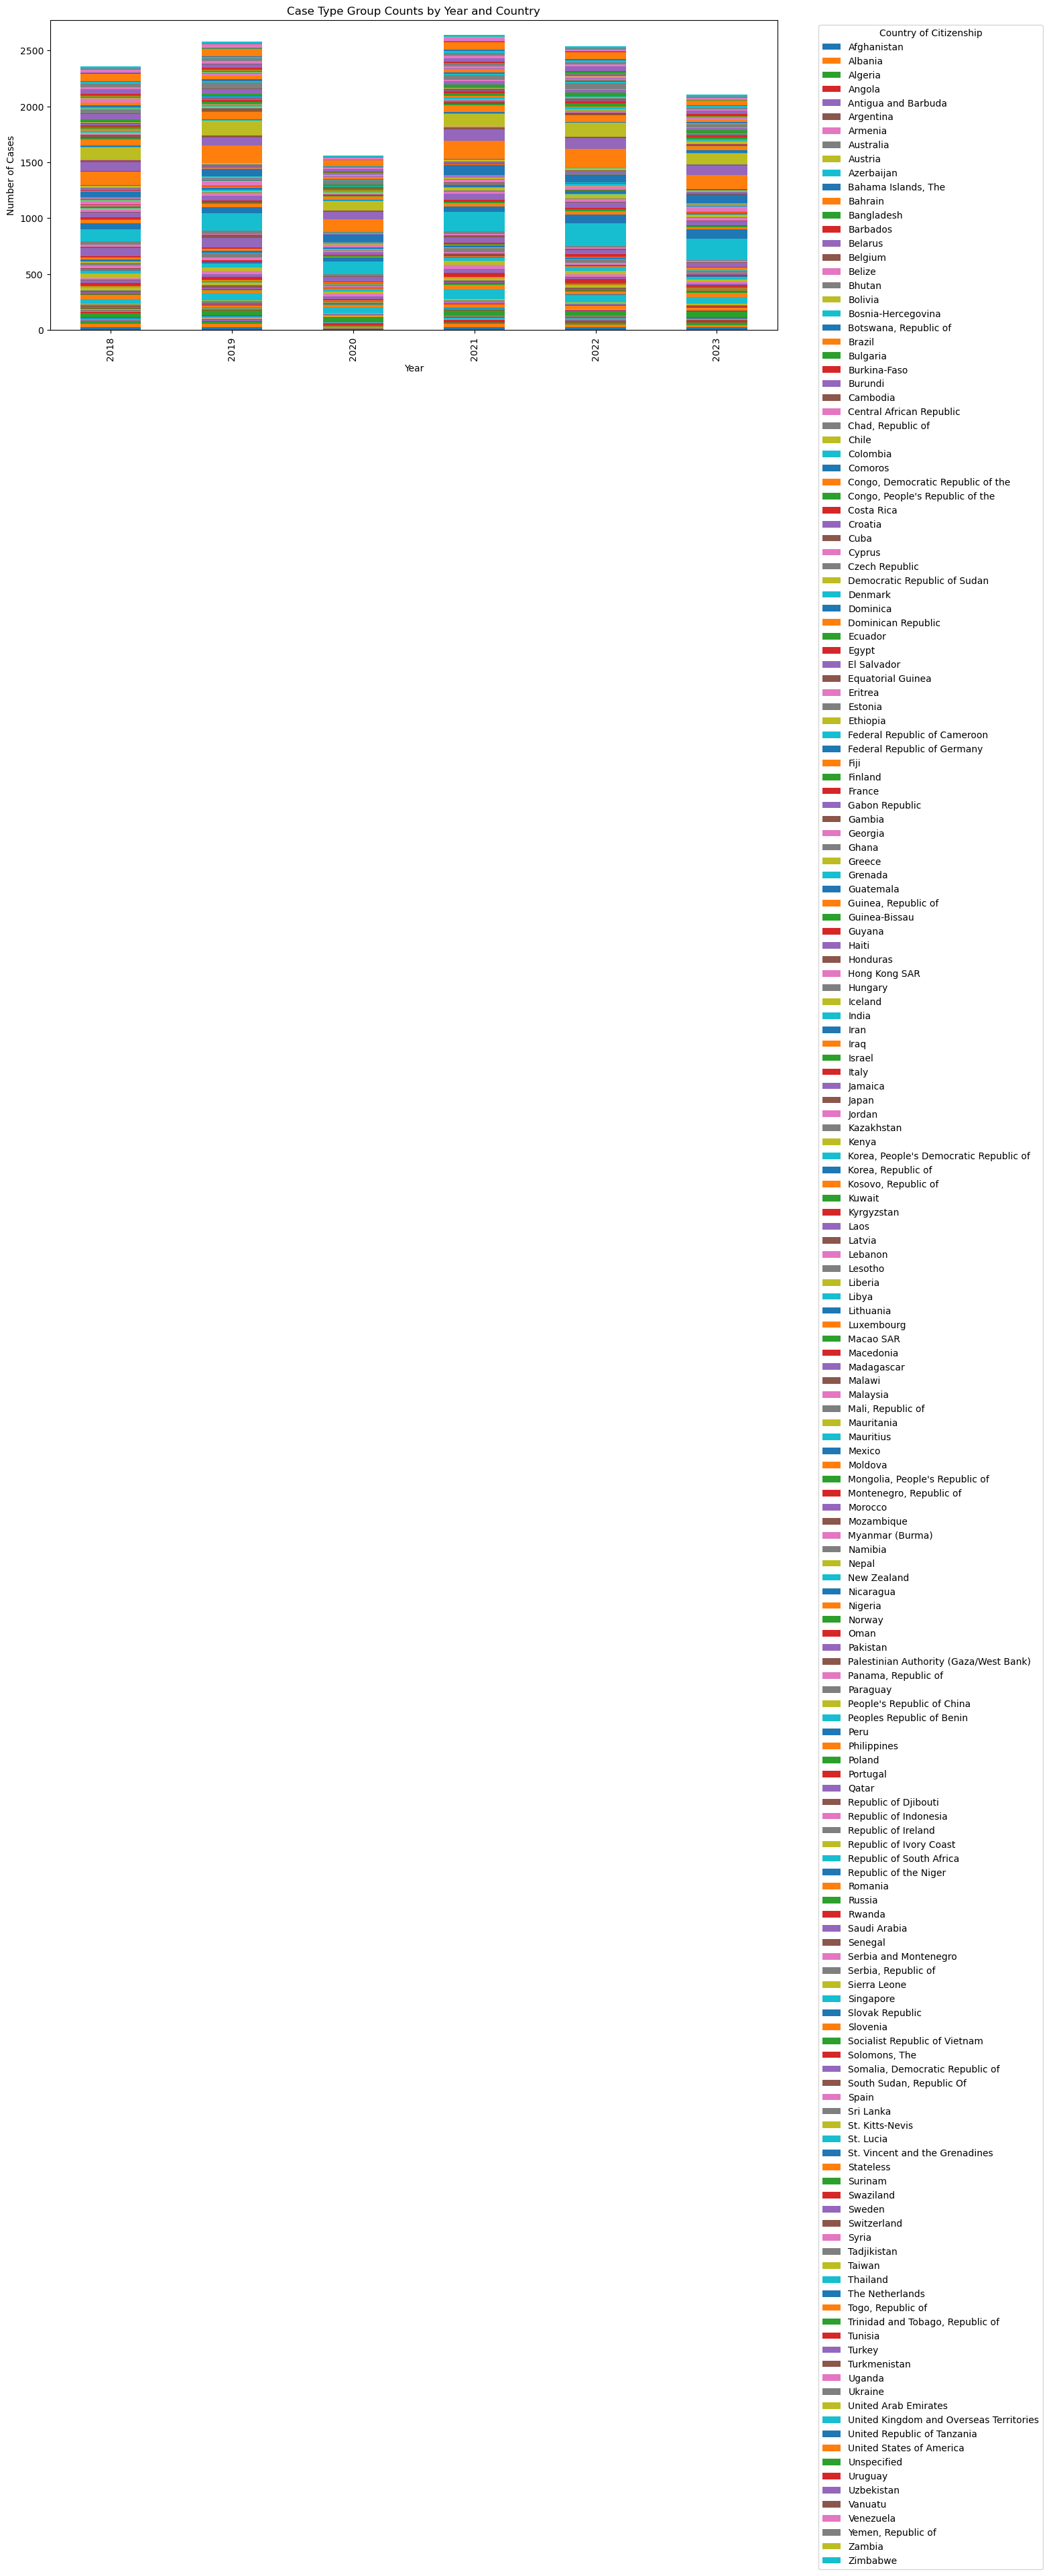

In [5]:
import matplotlib.pyplot as plt

# group data
grouped = df.groupby(['LIT Leave Decision Date - Year', 'Country of Citizenship'])['LIT Case Type Group Desc'].count().unstack(fill_value=0)

# plot
grouped.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Case Type Group Counts by Year and Country')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Country of Citizenship', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()